# 1 Regularization

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

Set up the data

In [17]:
# import dataset
df = pd.read_csv('Hitters.csv').dropna()
# rename the first column
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
# keep numeric columns
y = df.Salary
X = df.drop(['a','Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

## 1.1 LASSO regression

An array of alpha values ranging from very big to very small is generated.

In [12]:
alphas = 10**np.linspace(10,-2,100)*0.5
#alphas

Associated with each alpha value is a vector of LASSO regression coefficients, which we'll store in a matrix coefs.Then we create a visualization of the coefficient trajectories. 

Text(0, 0.5, 'weights')

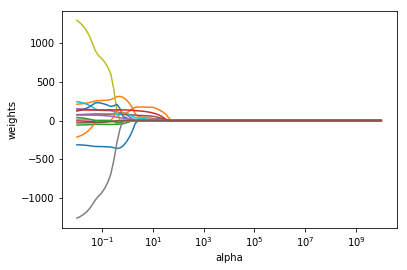

In [18]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Notice that in the coefficient plot that depending on the choice of tuning parameter, some of the coefficients are exactly equal to zero. We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [19]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

111160.39367053009

Only 6 variables are left in the model.

In [20]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.951516
HmRun      0.000000
Runs       0.000000
RBI        0.402763
Walks      2.774631
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.268635
CRuns      0.000000
CRBI       0.492185
CWalks     0.000000
PutOuts    0.394770
Assists    0.000000
Errors    -0.000000
dtype: float64

## 1.2 Ridge Regression

Visualize coeffecient trajectories. 

Text(0, 0.5, 'weights')

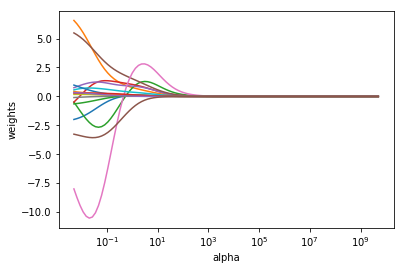

In [21]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Use cross-validation to find the optimal value of the regularization penality.

In [26]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.5748784976988678

Compute the test MSE associated with this value of alpha

In [27]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

104628.72833197894

All predictors are left in the model.None of the coefficients are exactly zero - ridge regression does not perform variable selection

In [28]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AtBat      0.046181
Hits       0.945478
HmRun      0.093945
Runs       1.128396
RBI        0.928647
Walks      1.769113
Years      0.774010
CAtBat     0.011170
CHits      0.061145
CHmRun     0.417670
CRuns      0.123833
CRBI       0.128025
CWalks     0.047186
PutOuts    0.183886
Assists    0.038948
Errors    -1.512571
dtype: float64

# 2 Short Answer

### Explain in your own words the bias-variance tradeoff.

The bias–variance tradeoff is the property of a set of predictive models whereby models with a lower bias in parameter estimation have a higher variance of the parameter estimates across samples, and vice versa. For example, linear regression is a relatively inflexible approach,which can be applied to various data (low variance). However linear regression tends to low prediction accuracy(high bias).

### What role does regularization play in this tradeoff?

Regularization has the effect of reducing variance and can also perform variable selection.

### Make reference to the first question to describe models of high/low bias and variance.

In the previous question, we see that LASSO regression performs variable selection, thus it has low variance and high bias (higher MSE than ridge regression). Ridge regression keeps all the predictors, which leads to high variance and low bias.